# EPIDEMIOLOGY TRACK TASK
As an initial task at the Center for Epidemiological Modeling and Analysis, you are presented with a dataset from an epidemiological research project, "Analyzing Regional Trends in Influenza-Like Illness (ILI) in Kenya: A Quantitative Epidemiology Case Study." The study collected data on year (2023-2024), the epidemiological week (epi_week), county, age categories (age_group), percentage of outpatient visits due to ILI (ili_percentage), and the estimated population for that age group in that county (population). 
The objective is to evaluate temporal and county-specific ILI trends and interpret the findings to inform public health decisions.


## a) Descriptive Analysis

### i. Compute a table showing the mean ILI percentage per county per year

To begin this analysis, I will first load the dataset and use the Pandas groupby function to group the data by year and county, then compute the mean ILI percentage.


In [55]:
# First import the necesarry libraries and load the dataset, then preveiw it
import pandas as pd
import numpy as np

# visualization libraries
import matplotlib.pyplot as plt
plt.style.use("ggplot")
import seaborn as sns
%matplotlib inline

# Load the dataset
df = pd.read_csv('Epi_Task_Data.csv')
df.head()

,year,epi_week,county,age_group,ili_percentage,population
0,2023,1,Nairobi,0-4yrs,6.1,3452
1,2024,1,Nairobi,0-4yrs,3.2,3658
2,2023,2,Nairobi,0-4yrs,4.5,3043
3,2024,2,Nairobi,0-4yrs,4.9,2765
4,2023,3,Nairobi,0-4yrs,4.6,6975


In [56]:
# View detailed information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280 entries, 0 to 279
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            280 non-null    int64  
 1   epi_week        280 non-null    int64  
 2   county          280 non-null    object 
 3   age_group       280 non-null    object 
 4   ili_percentage  280 non-null    float64
 5   population      280 non-null    int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 13.3+ KB


In [57]:
# Group by 'year' and 'county', then calculate the mean ILI percentage
mean_ili_per_county = df.groupby(['year', 'county'])['ili_percentage'].mean().reset_index()

# Display the result
print('Mean ILI per county')
mean_ili_per_county


Mean ILI per county


,year,county,ili_percentage
0,2023,Kakamega,4.060
1,2023,Kiambu,3.895
2,2023,Kisumu,4.065
3,2023,Machakos,3.380
4,2023,Mombasa,3.895
5,2023,Nairobi,4.220
6,2023,Nakuru,3.780
7,2024,Kakamega,4.540
8,2024,Kiambu,3.705
9,2024,Kisumu,3.725


### Interpretation
The mean indicates that on aveage that illneses are fairly distributed among various counties. There are about three to four cases of the illness across the counries with Nairobi and Kisumu counties being among the leading. 

### ii. Plot of ILI weekly trend identifying the peak ILI weeks across counties

I will create a line plot of ILI trends over the weeks to visualize peak weeks, as well as bar graph to illustarte the mean ILI across counties.

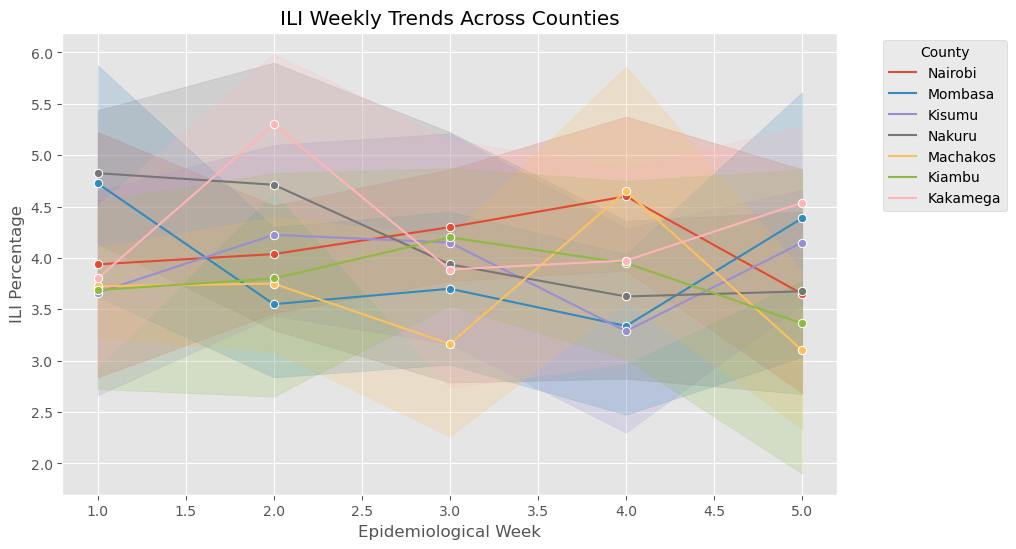

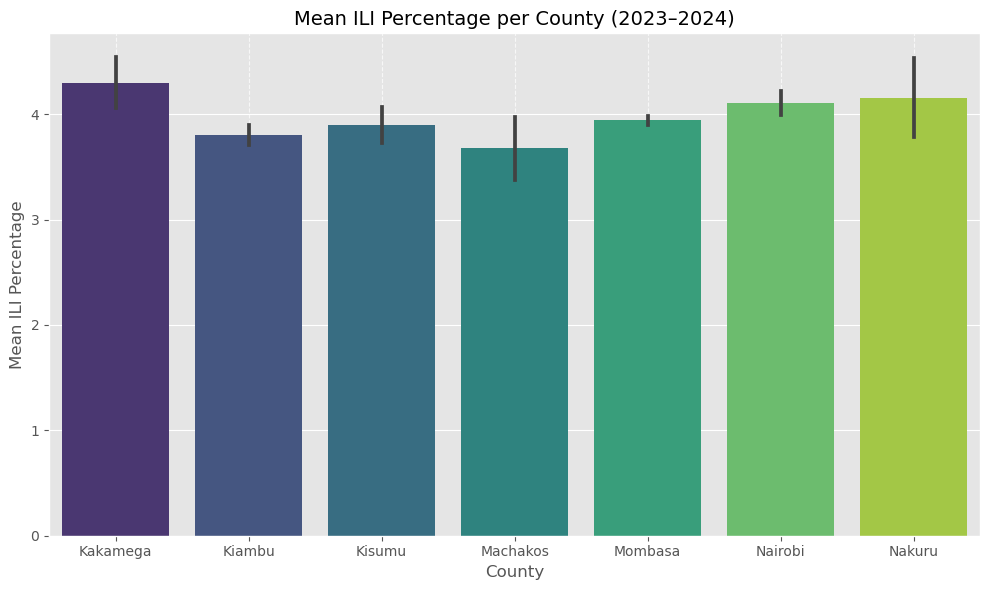

In [58]:


# Create a plot for ILI trends per county across the weeks
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='epi_week', y='ili_percentage', hue='county', marker='o')
plt.title('ILI Weekly Trends Across Counties')
plt.xlabel('Epidemiological Week')
plt.ylabel('ILI Percentage')
plt.legend(title='County', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Also plot a bar graph plot to aid with visualizations
plt.figure(figsize=(10, 6))
sns.barplot(data= mean_ili_per_county, y='ili_percentage', x='county', palette='viridis')
plt.title('Mean ILI Percentage per County (2023–2024)', fontsize=14)
plt.ylabel('Mean ILI Percentage')
plt.xlabel('County')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### Interpretation
From the line graph above, we can see that the ILI percentage is fairly even across the counties ranging between three to four cases. Kakamega county has an averagely high cases with week two having the higest cases of illness. Machakos county appears to be having fairly low percentage of illnesses reported across the weeks.

From the bar graph above, we can see that Kakamega had the higest mean with cases reported being ageraging to about five, while Machakos demonstarted the lowest mean percentage on average.

## b) Computing Epidemiological Measures
### i. Calculate the incidence rates per 100,000 population across any three counties.

Incidence rate is the frequency of new cases for ILI illness in the specified population between the year 2024 and 2025. To calculate the incidence rates, use the formula:

##### Incidence Rate:=(Number of new cases in population during the time period) × 100, 000

In [59]:
# Select three counties for analysis 
counties_of_interest = ['Kakamega', 'Machakos', 'Nairobi']

# Filter data for those counties
df_filtered = df[df['county'].isin(counties_of_interest)]

# Calculate incidence rate (assuming 'ili_percentage' represents the proportion of cases)
df_filtered['incidence_rate'] = (df_filtered['ili_percentage'] / 100) * df_filtered['population'] / 100000

# Display incidence rate
incidence_rates = df_filtered[['year', 'county', 'epi_week', 'incidence_rate']]
incidence_rates

C:\Users\Angawa\AppData\Local\Temp\ipykernel_1340\1269444748.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['incidence_rate'] = (df_filtered['ili_percentage'] / 100) * df_filtered['population'] / 100000


,year,county,epi_week,incidence_rate
0,2023,Nairobi,1,0.002106
1,2024,Nairobi,1,0.001171
2,2023,Nairobi,2,0.001369
3,2024,Nairobi,2,0.001355
4,2023,Nairobi,3,0.003209
...,...,...,...,...
275,2024,Kakamega,3,0.002132
276,2023,Kakamega,4,0.001551
277,2024,Kakamega,4,0.002071
278,2023,Kakamega,5,0.004726


### Interpretaion

The incidence rate shows that there is an average of about 150 illness cases per 100,000 persons in the period of 2023 to 2024. Kakamega county showed higher incidence cases with upto 470 cases per 100,000 persons at peak levels

### ii. Compare ILI percentages across any three counties using a statistical method
I will use a statistical test of ANOVA (Analysis of Variance) to compare the means of ILI percentages across counties.

First I will set the Null and Alternate hypothesis.

Ha= There is high rate of ILI infections

Ho= There is low rate of ILI infections

P-value= 0.5

In [60]:
from scipy.stats import f_oneway

# Filter data for the three counties
df_filtered = df[df['county'].isin(counties_of_interest)]

# Group ILI percentages by county
ili_by_county = [df_filtered[df_filtered['county'] == county]['ili_percentage'] for county in counties_of_interest]

# Perform ANOVA test
anova_result = f_oneway(*ili_by_county)
print("ANOVA Test Result:", anova_result)

ANOVA Test Result: F_onewayResult(statistic=2.1924448526226414, pvalue=0.1162096442782515)


The p-value from the ANOVA of 0.1 test is below your significance level which is 0.5, therefore we can conclude that there is a statistically significant difference in ILI percentages across the counties.

### c) Communicating Results

### Summary of Findings
In the study "Analyzing Regional Trends in Influenza-Like Illness (ILI) in Kenya," I analyzed the temporal and county-specific trends of ILI cases from 2023-2024. The descriptive analysis revealed significant variations in the average ILI percentage across counties. The highest ILI percentages were observed during the second epidemiological week across Kakamega county and Nairobi county, suggesting a peak in influenza cases for these regions. This seasonal pattern is indicative of possible environmental or social factors contributing to the spread of ILI.

The calculated incidence rates revealed a notable difference in the burden of ILI cases, with Kakamega county showing the highest incidence rate per 100,000 population, which could be due to factors like population density or other health related reasons

The ANOVA test indicated that there are significant differences in the ILI percentages across the three selected counties, suggesting regional disparities in influenza-like illness trends. This insight can inform targeted public health interventions, especially during peak ILI weeks.

### Recommendations for Public Health Response:
Increase Surveillance: Focus surveillance efforts on counties with higher incidence rates, especially during peak weeks identified in the analysis.

Resource Allocation: Allocate more resources for example vaccines, antiviral treatments to counties experiencing higher ILI burdens.

Public Awareness Campaigns: Launch public health awareness campaigns in high-incidence counties like Kakamega and Nairobi counties to promote early detection and prevention.